In [1]:
import os
import math
import matplotlib.pyplot as plt
import jax
import jax.numpy as np
import params
import model
import convert
import stimulus

In [2]:
def show_figure(states, times, figsize, dt, rows=5):
    cols = math.ceil((len(states) / rows))
    fig, ax = plt.subplots(cols, rows, figsize=figsize)
    idx = 0
    for col in range(cols):
        for row in range(rows):
            if idx >= len(states):
                return
            ax[col, row].imshow(states[idx], cmap="magma", vmin=0, vmax=1,)
            ax[col, row].set_title("Iter: " + str(times[idx + 1]) + " (%sms)" % convert.units_to_ms(times[idx + 1], dt))
            idx += 1

In [3]:
# simulation inputs (real values)
field_size = (10, 10)  # cm
d = 0.001  # (cm^2/ms)
cell_parameters = params.params5()

In [35]:
# infinitesimals
dx = 0.01  # (cm/units) - Fenton 1998 recommends ~200, 300 micron/gridunit (~0.02, 0.03), smaller dx means finer grid
dt = 0.01  # (ms) - Fenton 1998 recommends few hundreds of ms (~0.01, 0.04)

(666, 666)
real tissue size: (10, 10)
Checkpointing at: [0, 23333, 25666, 27000, 28333, 29666, 30666, 31666, 33000, 34000, 35000, 38333, 41666, 60666, 74333, 77333, 80666, 84000, 86666, 89333, 92666, 94666, 98666, 102000, 106666, 111333]
{'tau_v_plus': 3.33, 'tau_v1_minus': 12, 'tau_v2_minus': 2, 'tau_w_plus': 1000, 'tau_w_minus': 100, 'tau_d': 0.362, 'tau_0': 5, 'tau_r': 33.33, 'tau_si': 29, 'k': 15, 'V_csi': 0.7, 'V_c': 0.13, 'V_v': 0.04, 'Cm': 1}


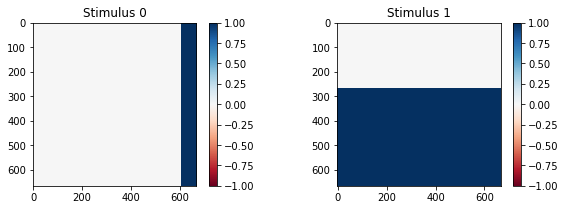

In [25]:
# to computational units
shape = convert.field_to_shape(field_size, dx)

stripe_size = int(shape[0] / 10)

protocol1 = stimulus.protocol(start=0, duration=2, period=0)
s1 = stimulus.rectangular(shape, jax.ops.index[:, -stripe_size:], 1., protocol1)

protocol2 = stimulus.protocol(start=convert.ms_to_units(400, dt), duration=2, period=0)
s2 = stimulus.rectangular(shape, jax.ops.index[-convert.cm_to_units(6, dx):], 1., protocol2)

stimuli = [s1, s2]

checkpoints = [0, 350, 385, 405, 425, 445, 460, 475, 495, 510, 525, 575, 625, 910, 1115, 1160, 1210, 1260, 1300, 1340, 1390, 1420, 1480, 1530, 1600, 1670]
checkpoints = [convert.ms_to_units(ck, dt) for ck in checkpoints]

print(shape)
print("real tissue size:", field_size)
print("Checkpointing at:", checkpoints)
print(cell_parameters)
model.show_stimuli(*stimuli)

In [26]:
state = model.init(shape)
states = []
for i in range(len(checkpoints) - 1):
    state = model._forward(state, checkpoints[i], checkpoints[i + 1], cell_parameters, np.ones(shape) * d, stimuli, dt, dx)
    u = state[2]
    states.append(u)
#     model.show(state)
          
show_figure(states, checkpoints, (20, 20), dt)

KeyboardInterrupt: 

(1000, 1000)
real tissue size: (10, 10)
Checkpointing at: [0, 35000, 38500, 40500, 42500, 44500, 46000, 47500, 49500, 51000, 52500, 57500, 62500, 91000, 111500, 116000, 121000, 126000, 130000, 134000, 139000, 142000, 148000, 153000, 160000, 167000]
{'tau_v_plus': 3.33, 'tau_v1_minus': 12, 'tau_v2_minus': 2, 'tau_w_plus': 1000, 'tau_w_minus': 100, 'tau_d': 0.362, 'tau_0': 5, 'tau_r': 33.33, 'tau_si': 29, 'k': 15, 'V_csi': 0.7, 'V_c': 0.13, 'V_v': 0.04, 'Cm': 1}


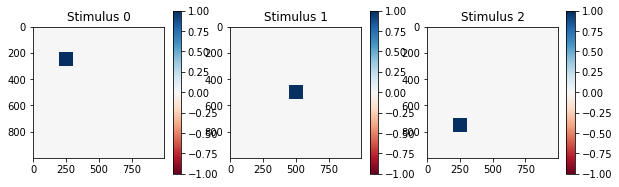

In [36]:
# to computational units
shape = convert.field_to_shape(field_size, dx)

stripe_size = int(shape[0] / 10)

protocol1 = stimulus.protocol(start=0, duration=2, period=0)
x1 = convert.cm_to_units(2, dx)
x2 = convert.cm_to_units(3, dx)
y1 = convert.cm_to_units(2, dx)
y2 = convert.cm_to_units(3, dx)
s1 = stimulus.rectangular(shape, jax.ops.index[x1:x2, y1:y2], 1., protocol1)

protocol2 = stimulus.protocol(start=convert.ms_to_units(445, dt), duration=2, period=0)
x1 = convert.cm_to_units(4.5, dx)
x2 = convert.cm_to_units(5.5, dx)
y1 = convert.cm_to_units(4.5, dx)
y2 = convert.cm_to_units(5.5, dx)
s2 = stimulus.rectangular(shape, jax.ops.index[x1:x2, y1:y2], 1., protocol2)

protocol3 = stimulus.protocol(start=convert.ms_to_units(495, dt), duration=2, period=0)
x1 = convert.cm_to_units(7, dx)
x2 = convert.cm_to_units(8, dx)
y1 = convert.cm_to_units(2, dx)
y2 = convert.cm_to_units(3, dx)
s3 = stimulus.rectangular(shape, jax.ops.index[x1:x2, y1:y2], 1., protocol3)

stimuli = [s1, s2, s3]

checkpoints = [0, 350, 385, 405, 425, 445, 460, 475, 495, 510, 525, 575, 625, 910, 1115, 1160, 1210, 1260, 1300, 1340, 1390, 1420, 1480, 1530, 1600, 1670]
checkpoints = [convert.ms_to_units(ck, dt) for ck in checkpoints]

print(shape)
print("real tissue size:", field_size)
print("Checkpointing at:", checkpoints)
print(cell_parameters)
model.show_stimuli(*stimuli)

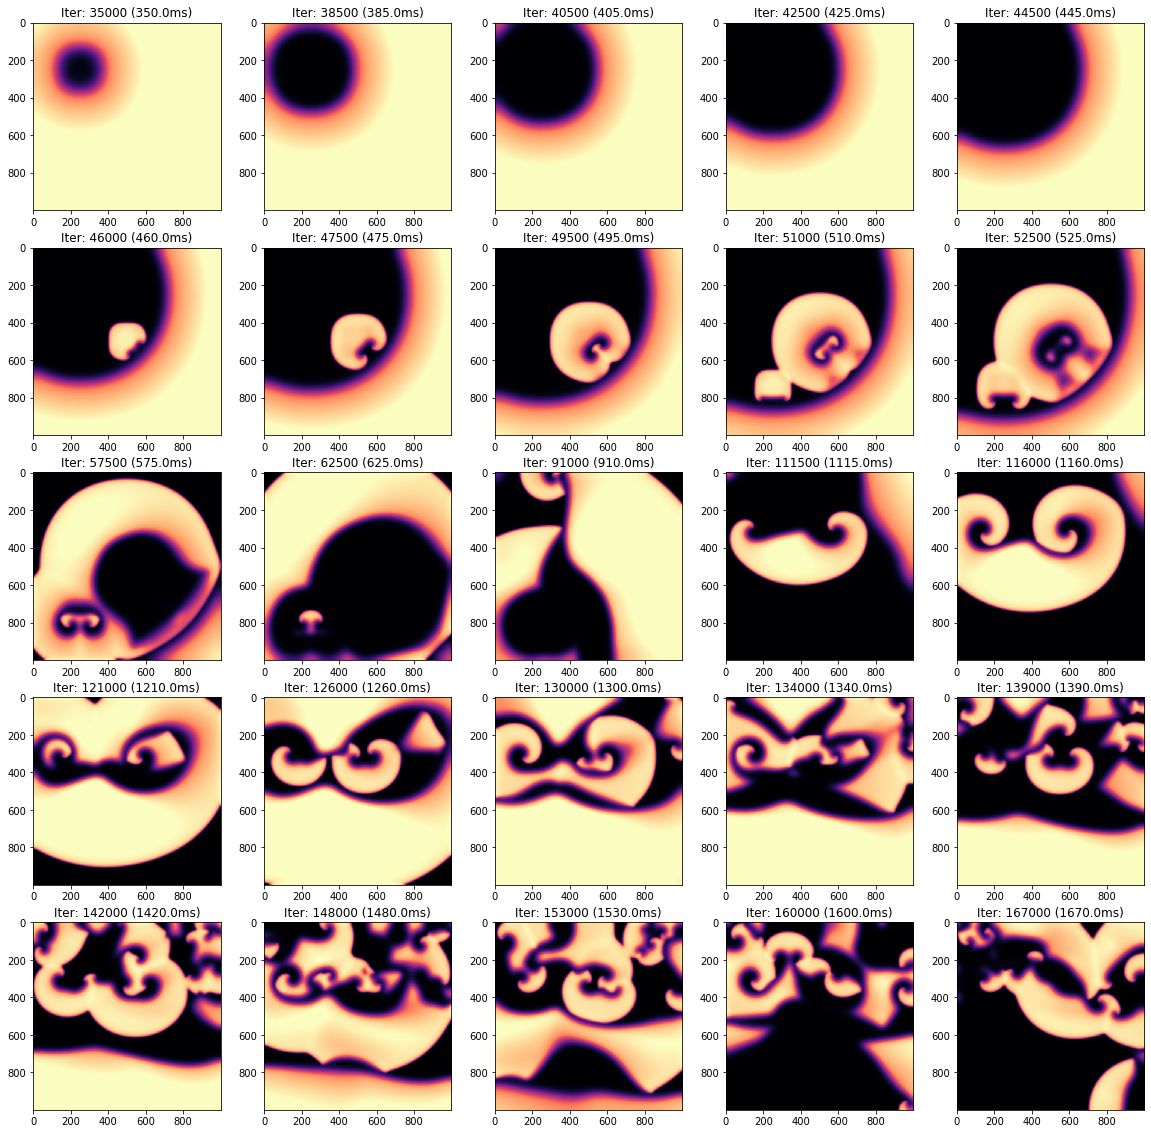

In [37]:
state = model.init(shape)
states = []
for i in range(len(checkpoints) - 1):
    state = model._forward(state, checkpoints[i], checkpoints[i + 1], cell_parameters, np.ones(shape) * d, stimuli, dt, dx)
    u = state[2]
    states.append(u)
#     model.show(state)
          
show_figure(states, checkpoints, (20, 20), dt)